# Derivative of Matrix

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

In [2]:
I = img.imread('./doggo.jpg', format = None) 

## check the size of image

In [3]:
n_row = 383
n_col = 512

print(I.shape)

(383, 512, 3)


## convert the input image into gray scale if it is color

In [4]:
if I.shape[2] == 3:
    I = 1/3 * (I[:,:,0] + I[:,:,1] + I[:,:,2])
#     0.2989 * I[:, :, 0] + 0.5870 * I[:, :, 1] + 0.1140 * I[:, :, 2]

## normalize input image so that the range of image is $[0, 1]$

In [5]:
I = (I - I.min()) / (I.max() - I.min())

```git commit -a -m "load image" ``` \
```git push origin master```

## generate a matrix to compute the derivative in $x$-direction

In [6]:
Dx = np.diag(np.ones(n_col) * -1)
Dx_1 = np.ones(n_col - 1)
Dx_1 = np.diag(Dx_1, k = -1)
Dx = Dx + Dx_1
print(Dx)
Dx.shape

[[-1.  0.  0. ...  0.  0.  0.]
 [ 1. -1.  0. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ...  0.  1. -1.]]


(512, 512)

## compute the derivative of $I$ with respect to $x$-direction

In [7]:
Ix = I @ Dx
print(Ix)
Ix.shape

[[ 0.          0.          0.01176471 ...  0.         -0.01176471
  -0.71764706]
 [ 0.          0.          0.01176471 ...  0.          0.
  -0.72941176]
 [ 0.          0.01176471  0.         ...  0.          0.
  -0.72941176]
 ...
 [ 0.01960784  0.05490196  0.0627451  ...  0.          0.
  -0.20392157]
 [ 0.02352941  0.03529412  0.04313725 ... -0.01176471 -0.00784314
  -0.20784314]
 [ 0.01176471  0.02352941  0.00784314 ... -0.01568627 -0.01176471
  -0.21960784]]


(383, 512)

```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## generate a matrix to compute the derivative in $y$-direction

In [8]:
Dy = np.diag(np.ones(n_row) * -1)
Dy_1 = np.ones(n_row - 1)
Dy_1 = np.diag(Dy_1, k = 1)
Dy = Dy + Dy_1
print(Dy)
Dy.shape

[[-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  1.  0.]
 [ 0.  0.  0. ...  0. -1.  1.]
 [ 0.  0.  0. ...  0.  0. -1.]]


(383, 383)

## compute the derivative of $I$ with respect to $y$-direction

In [9]:
Iy = Dy @ I
print(Iy)
Iy.shape

[[ 0.          0.          0.         ...  0.          0.
   0.01176471]
 [ 0.          0.          0.01176471 ...  0.          0.
   0.        ]
 [ 0.          0.01176471  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.02352941  0.02745098  0.00784314 ...  0.02352941  0.01176471
   0.00392157]
 [ 0.05098039  0.03921569  0.02745098 ...  0.01960784  0.01568627
   0.01176471]
 [-0.21568627 -0.22745098 -0.25098039 ... -0.24705882 -0.23137255
  -0.21960784]]


(383, 512)

```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [46]:
norm_gradient = (Ix * Ix) + (Iy * Iy)
print(norm_gradient)

[[0.00000000e+00 0.00000000e+00 1.38408304e-04 ... 0.00000000e+00
  1.38408304e-04 5.15155709e-01]
 [0.00000000e+00 0.00000000e+00 2.76816609e-04 ... 0.00000000e+00
  0.00000000e+00 5.32041522e-01]
 [0.00000000e+00 2.76816609e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.32041522e-01]
 ...
 [9.38100730e-04 3.76778162e-03 3.99846213e-03 ... 5.53633218e-04
  1.38408304e-04 4.15993849e-02]
 [3.15263360e-03 2.78354479e-03 2.61437908e-03 ... 5.22875817e-04
  3.07574010e-04 4.33371780e-02]
 [4.66589773e-02 5.22875817e-02 6.30526720e-02 ... 6.12841215e-02
  5.36716647e-02 9.64552095e-02]]


## define functions for the visualization

In [47]:
def plot_image(I):
    
    plt.figure(figsize=(10,10))
    plt.imshow(I, cmap = 'gray', )
    plt.title('input image')
    plt.axis('off')
        
def plot_image_derivative_x(Ix):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Ix, norm = colors.LogNorm(), cmap = 'gray')
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Iy, norm = colors.LogNorm(), cmap = 'gray')
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):

    plt.figure(figsize=(10,10))
    plt.imshow(norm_gradient, norm = colors.LogNorm(), cmap = 'gray')
    plt.title('norm gradient')
    plt.axis('off')

```git commit -a -m "define functions for the visualization"``` \
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

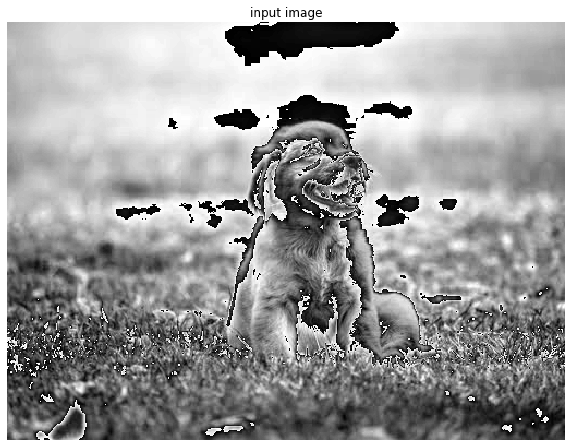

In [48]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

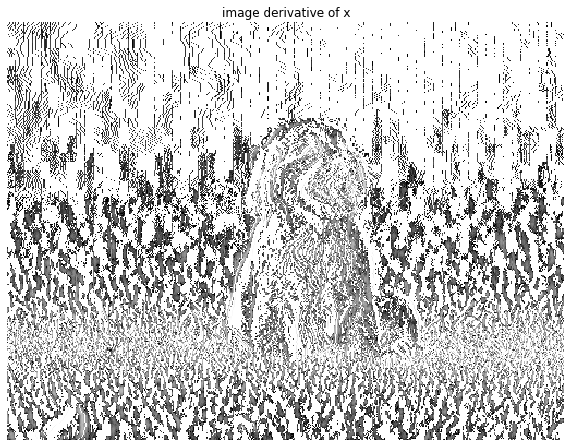

In [49]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

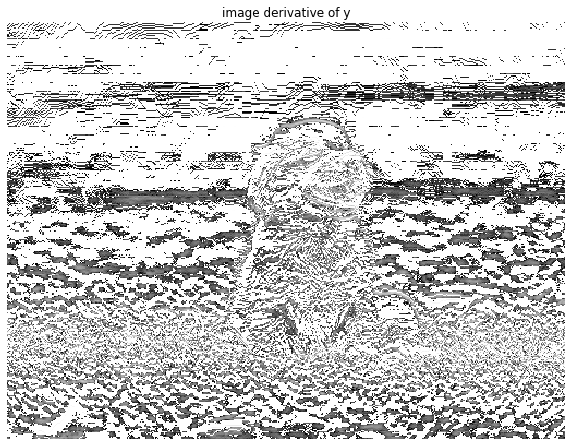

In [50]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

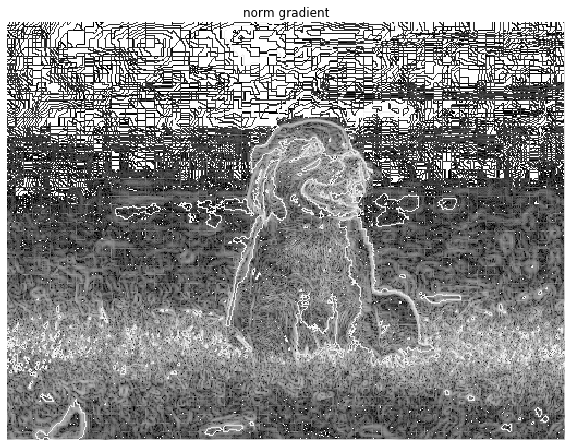

In [51]:
plot_norm_gradient(norm_gradient)